# 0515-689-BatuhanKaraköse/0515-645_DogaÖgüt/0515-700_SacideSelenayŞekerci

# PROJE2(TAHMİNLEME)

# IMPORT

In [1]:
#IMPORT İŞLEMLERİ
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

# VERİ OKUMA

In [2]:
#YAĞIŞ OKUMA(1901-2015)
rainfall=pd.read_excel("pr_1901_2015.xls")#yağmur
rainfall.dropna(how='all',axis=1,inplace=True)
rainfall.columns=["Rainfall","Year","Month","Country"]

In [3]:
#TL KURU OKUMA(1990-2015)
tlkur= pd.read_csv('TL_Dolar.csv')
tlkur=tlkur.loc[:,['TIME','Value']]
tlkur=pd.DataFrame(tlkur)
tlkur['TIME']=(tlkur['TIME'].str.replace('-', '.')).astype(float)
tlkur.set_index('TIME',inplace=True)

In [5]:
#TERÖR OLAYLARINA İLİŞKİN VERİ OKUMA (1970-216) 
teror=pd.read_excel("Turkey_Terror.xlsx")

#Verileri, günlük gerçekleşen terör olaylarının sayılarını toplayıp ay ve yıla göre gruplama
teror =pd.DataFrame(teror.groupby(["iyear","imonth"]).size().reset_index(name='Number of terrorist acts'))
teror.columns=["Year","Month","Number of terrorist acts"]

In [6]:
#TURİST VERİSİ OKUMA (1990-2015)
tourist=pd.read_excel("Turist.xls",skiprows=3)
tourist=tourist.iloc[:-9,]
tourist.index=['January','February','March','April','May','June','July','August','September','October','November','December','Total']
tourist.drop('AYLAR                           Months ',inplace=True,axis=1)
tourist=tourist.T
tourist=tourist.iloc[:-3] #2015 e kadar olan verileri aldık
tourist['Mean']=tourist.iloc[:,0:12].mean(axis=1)
tourist.head(5)

,January,February,March,April,May,June,July,August,September,October,November,December,Total,Mean
1990,115058.0,143215.0,242987.0,429624.0,529552.0,559266.0,707824.0,777793.0,667359.0,526115.0,367300.0,323215.0,5389308.0,449109.000000
1991,157674.0,157123.0,284039.0,376502.0,502029.0,517785.0,635835.0,761744.0,773458.0,581371.0,404267.0,366070.0,5517897.0,459824.750000
1992,208740.0,255040.0,337582.0,579022.0,739918.0,727002.0,970394.0,992640.0,861166.0,697642.0,370878.0,336072.0,7076096.0,589674.666667
1993,211573.0,273666.0,343780.0,578292.0,797637.0,682401.0,743819.0,784532.0,692967.0,699415.0,382736.0,309820.0,6500638.0,541719.833333
1994,267658.0,301811.0,394107.0,468550.0,644589.0,671333.0,820386.0,899189.0,773954.0,695471.0,392040.0,341530.0,6670618.0,555884.833333


In [7]:
#SICAKLIK VERİLERİ(1901-2015)
sıcaklık=pd.read_excel("tas_1901_2015.xls")
sıcaklık.dropna(how='all',axis=1,inplace=True)
sıcaklık.columns=["Temperature","Year","Month","Country"]
sıcaklık.head(5)

,Temperature,Year,Month,Country
0,-2.39890,1901,1,TUR
1,2.79189,1901,2,TUR
2,7.64930,1901,3,TUR
3,10.79240,1901,4,TUR
4,13.29050,1901,5,TUR


## Visualization

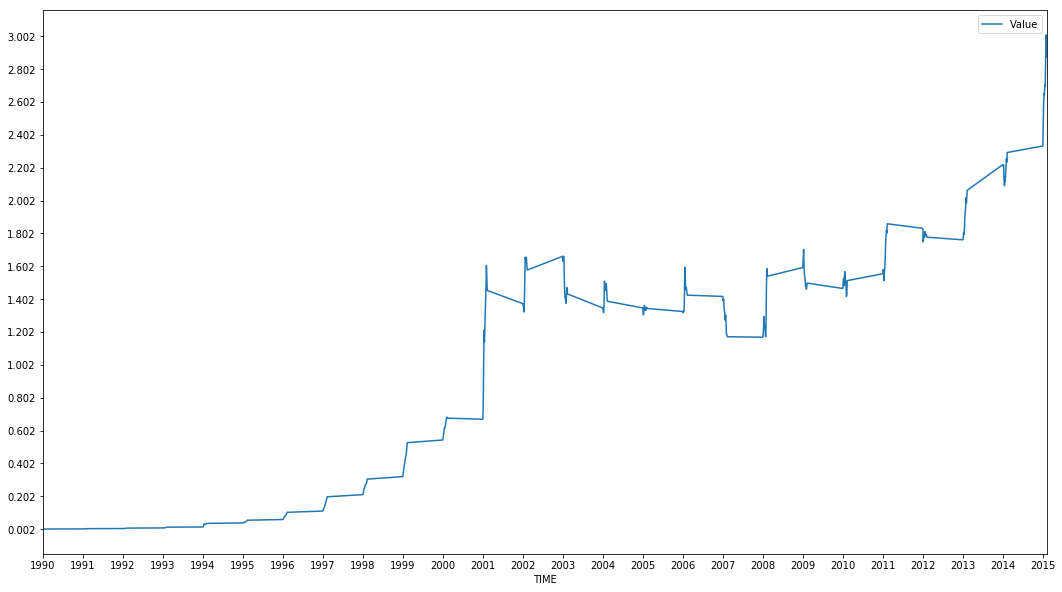

In [8]:
#TL KURU GRAFİĞİ
tlkur.plot(kind='line',figsize=(18,10),yticks=np.arange(tlkur.Value.min(), tlkur.Value.max(), 0.2),xticks=np.arange(tlkur.index.min(),tlkur.index.max(),1))  

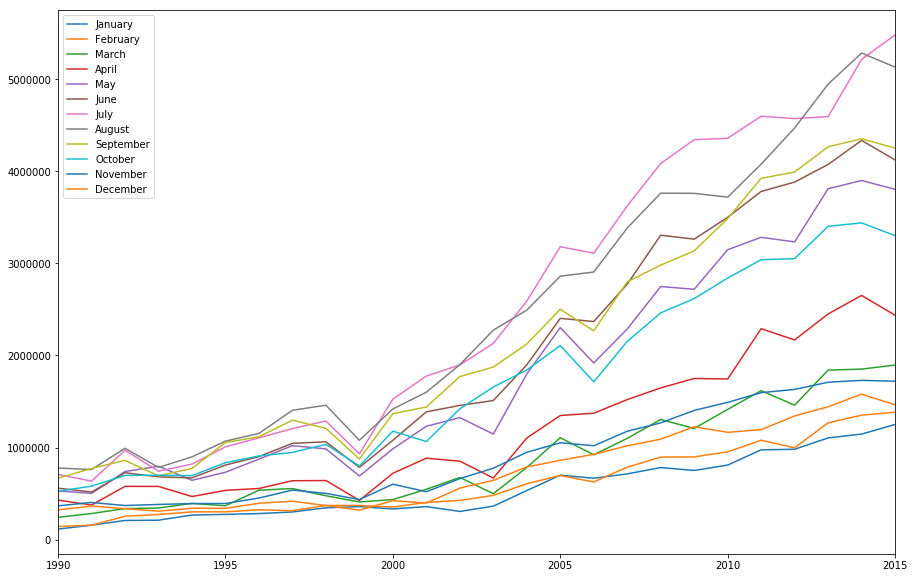

In [9]:
#TURİST GRAFİĞİ
tourist.iloc[:,:-2].plot(kind='line',figsize=(15,10))

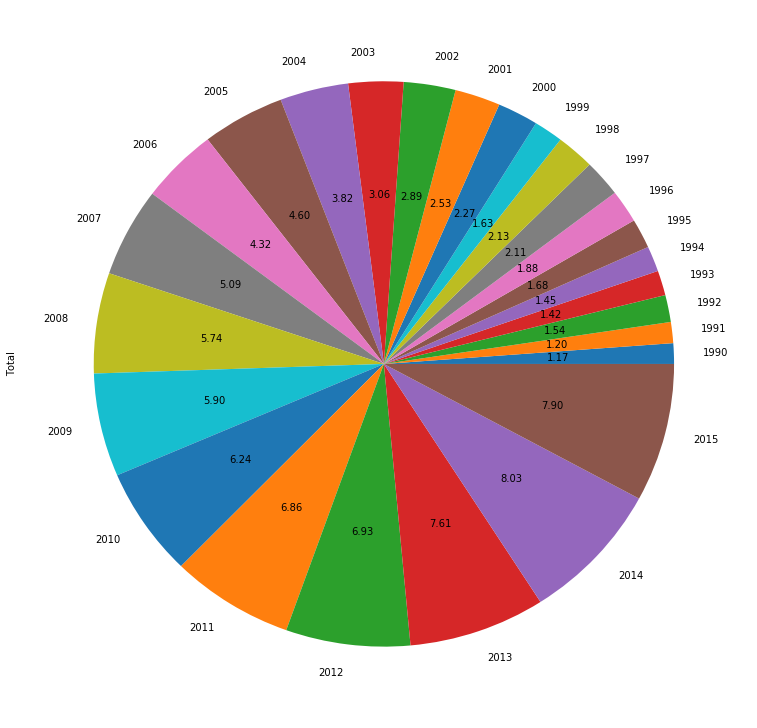

In [10]:
#YILLARA GÖRE GELEN TURİST SAYISI GRAFİĞİ
tourist.Total.plot(kind='pie',autopct='%.2f',figsize=(13,13))

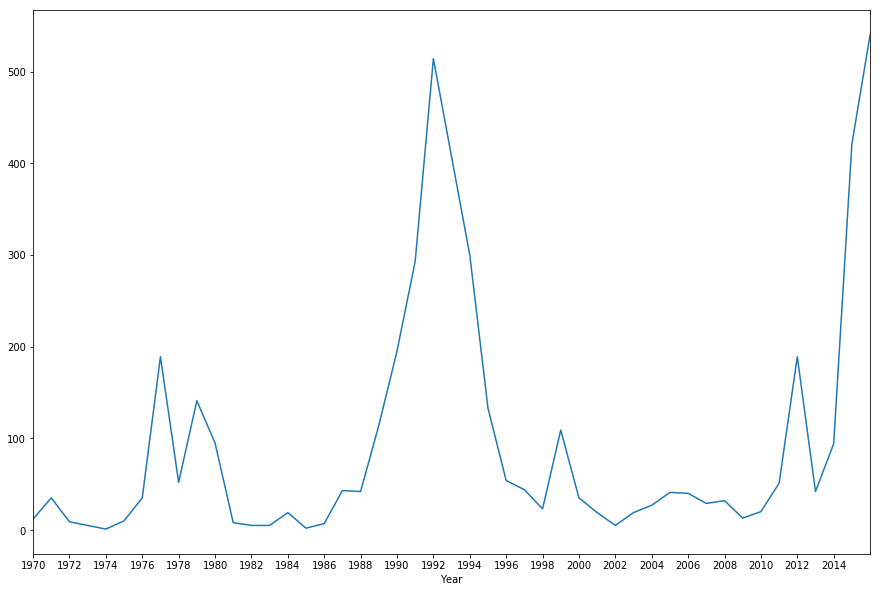

In [11]:
#YILLARA GÖRE TOPLAM TERÖR OLAYLARI
teror_temp=teror.copy(deep=True)
teror_temp.groupby('Year')['Number of terrorist acts'].sum().plot(kind='line',figsize=(15,10),xticks=np.arange(teror_temp['Year'].min(),teror_temp['Year'].max(),2))

# VERİ BİRLEŞTİRME

In [12]:
#YAĞIŞ VE SICAKLIK VERİLERİNİ BİRLEŞTİRME
yagis_sıcaklık=pd.merge(rainfall,sıcaklık, left_on=['Year','Month'], right_on = ['Year','Month'],how='inner')
yagis_sıcaklık.drop(['Country_y','Country_x'],axis=1,inplace=True)
yagis_sıcaklık[yagis_sıcaklık.Year==1990]

,Rainfall,Year,Month,Temperature
1068,32.84230,1990,1,-2.93780
1069,50.12430,1990,2,0.89267
1070,22.94460,1990,3,5.44875
1071,69.14690,1990,4,9.89901
1072,50.60300,1990,5,14.19800
1073,31.16840,1990,6,18.58660
1074,12.93800,1990,7,22.78230
1075,8.97781,1990,8,21.44300
1076,24.20360,1990,9,17.80110
1077,32.31680,1990,10,13.04580


# VERİ GÖRSELLEŞTİRME(yagis_sıcaklık ÜZERİNDEN)

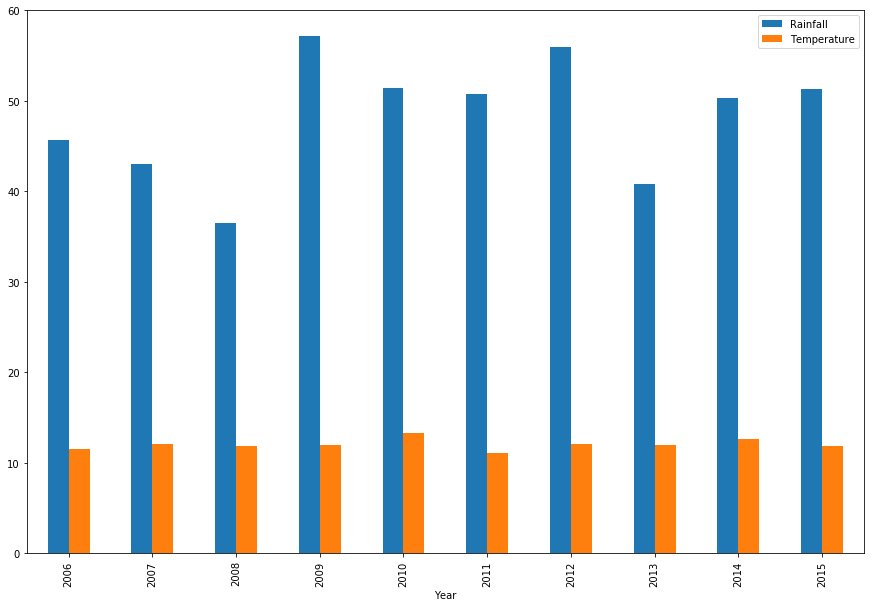

In [13]:
#YILLARA GÖRE YAĞIŞ VE SICAKLIK GRAFİĞİ
pd.DataFrame(yagis_sıcaklık.groupby('Year')['Rainfall','Temperature'].mean())[-10:].plot(kind='bar',figsize=(15,10))

In [14]:
#VERİYİ AY VE YILA GÖRE GRUPLADIK 
yagis_sıcaklık_grouped=yagis_sıcaklık.groupby([yagis_sıcaklık.Year,yagis_sıcaklık.Month]).sum() #sum ya da  mean yazmazsak birleşirmiyor veriyi 
yagis_sıcaklık_grouped.loc[1990]


,Rainfall,Temperature
Month,,
1,32.84230,-2.93780
2,50.12430,0.89267
3,22.94460,5.44875
4,69.14690,9.89901
5,50.60300,14.19800
6,31.16840,18.58660
7,12.93800,22.78230
8,8.97781,21.44300
9,24.20360,17.80110


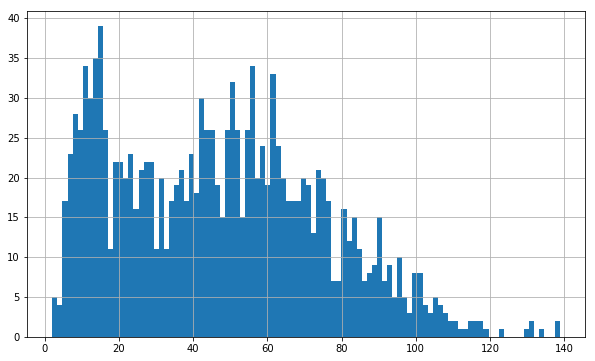

In [55]:
#AYLARA GÖRE YAĞIŞ
%matplotlib inline
yagis_sıcaklık_grouped.Rainfall.hist(bins=100,figsize=(10,6))

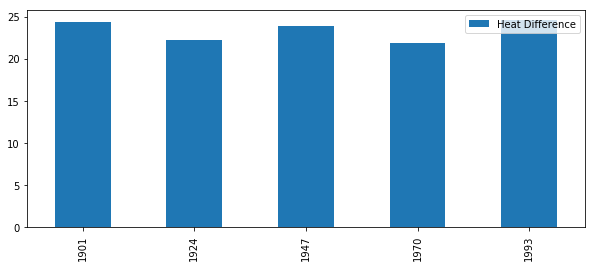

In [16]:
#SICAKLIK FARKI
heatdiff=pd.DataFrame(index=[x for x in range(1901,2016,23)],columns=['Heat Difference'])
for i in range(1901,2016,23):
    selectedyear=yagis_sıcaklık_grouped.loc[i]
    heatdiff.loc[i]=selectedyear.Temperature.max()- selectedyear.Temperature.min()
heatdiff.plot(kind='bar',figsize=(10,4))    

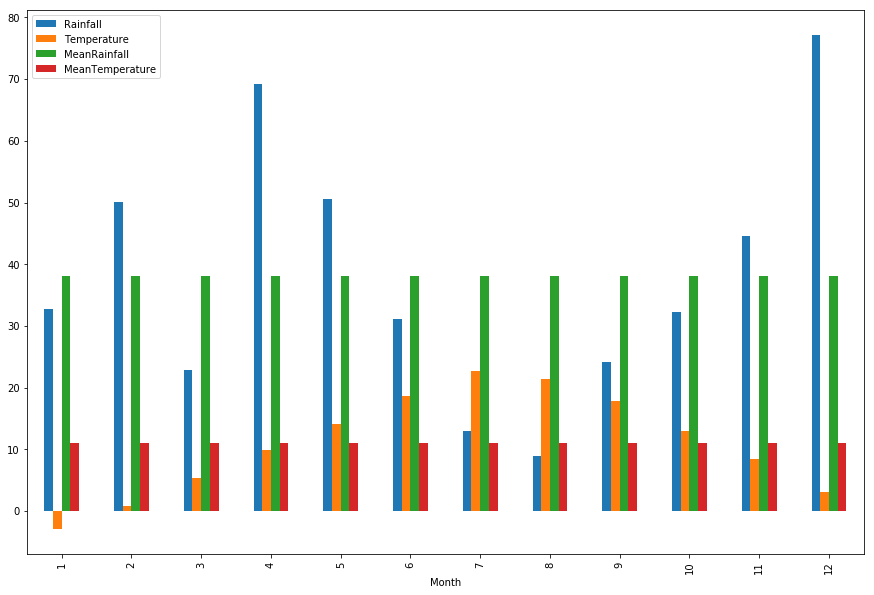

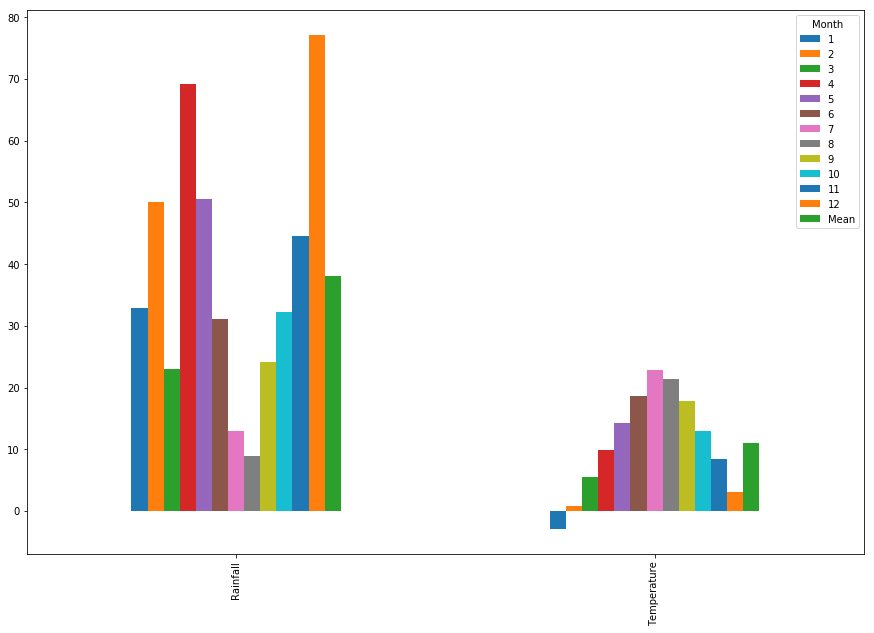

In [17]:
#1990 İÇİN AYLARA GÖRE YAĞIŞ,SICAKLIK VE ORTALAMALARI GRAFİĞİ()
nineties=yagis_sıcaklık_grouped.loc[1990]

nineties['MeanRainfall']=nineties.Rainfall.mean()
nineties['MeanTemperature']=nineties.Temperature.mean()
nineties.plot(kind='bar',figsize=(15,10))

nineties=yagis_sıcaklık_grouped.loc[1990]
nineties=nineties.T
nineties['Mean']=nineties.loc[:,:].mean(axis=1)
nineties.plot(kind='bar',figsize=(15,10))

In [18]:
#VERİ GÖRSELLEŞTİRME TURİST SAYISI VERİSİNİN DİĞER PARAMETRELER İLE İLŞKİSİNİN GÖRSELLEŞTİRİLMESİ
def mergewithTourism(year):
    
    nineties=pd.DataFrame(sıcaklık[sıcaklık.Year==year]['Temperature'])


    nineties['Exchange Rate of Dollar']=(tlkur.iloc[(year-1990)*12:(year-1990)*12+12]).values
    nineties['Num. of incoming Tourists']=(tourist.iloc[(year-1990),:-2]).values#total ve mean olmamsı için -2
    a=pd.merge(rainfall[rainfall.Year==year],teror[teror.Year==year],left_on=['Year','Month'], right_on = ['Year','Month'],how='outer')
    a.fillna(0,inplace=True)
    nineties['Number of terrorist acts']=a['Number of terrorist acts'].values
    nineties['Rainfall']=a.Rainfall.values
   
    nineties.index=tourist.iloc[:,:-2].columns
    
    nineties.plot(x='Exchange Rate of Dollar',y='Num. of incoming Tourists', kind='scatter',figsize=(10,4)
                 )
    
    nineties.plot(x='Number of terrorist acts',y='Num. of incoming Tourists', kind='scatter',figsize=(10,4))
    
    nineties.plot(x='Rainfall',y='Num. of incoming Tourists', kind='scatter',figsize=(10,4))  
    
    nineties.plot(x='Temperature',y='Num. of incoming Tourists', kind='scatter',figsize=(10,4))
    
 

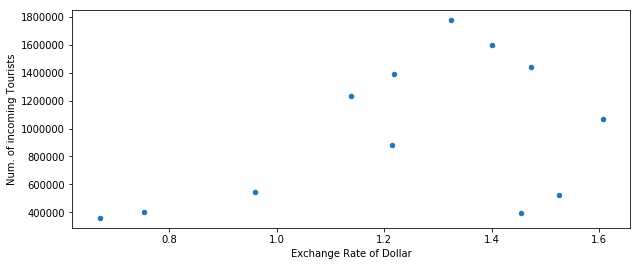

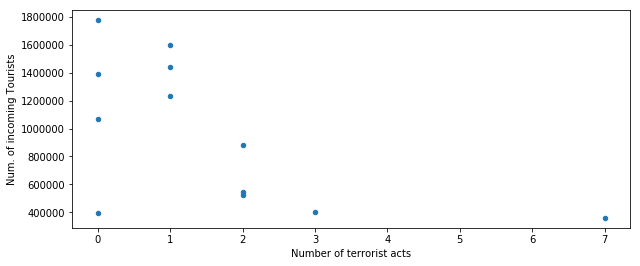

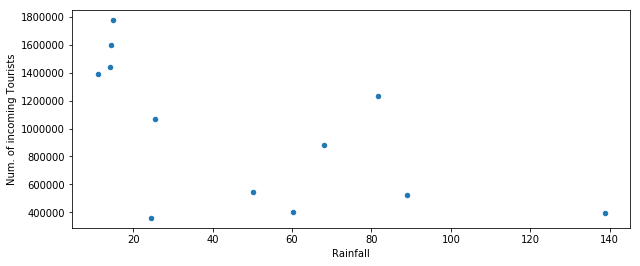

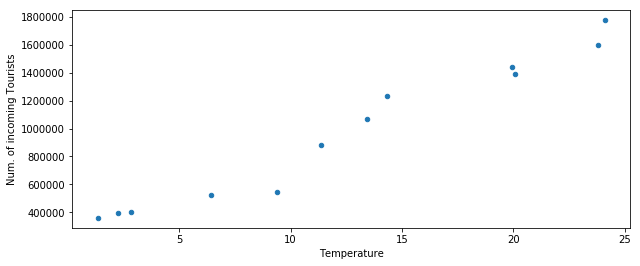

In [19]:
mergewithTourism(2001)



# Eğitim Verisini Oluşturma

In [59]:
#VERİ BİRLEŞTİRME
TrainingSet=pd.DataFrame(sıcaklık[sıcaklık.Year>=1990]['Temperature'])
TrainingSet['Exchange Rate of Dollar']=tlkur.Value.values

a=pd.merge(rainfall[rainfall.Year>=1990],teror[teror.Year>=1990],left_on=['Year','Month'], right_on = ['Year','Month'],how='outer')
a=a.loc[(a['Year'] <= 2015)]
a.fillna(0,inplace=True)
TrainingSet['Number of terrorist acts']=a['Number of terrorist acts'].values
ans=input('Yağış miktarı feature ını eklemek istiyor musunuz? e/h')

if(ans=='e'):
    TrainingSet['Rainfall']=a.Rainfall.values
TrainingSet.reset_index(inplace=True)
TrainingSet.drop('index',axis=1,inplace=True)
TrainingSet.head(5)

Yağış miktarı feature ını eklemek istiyor musunuz? e/he


,Temperature,Exchange Rate of Dollar,Number of terrorist acts,Rainfall
0,-2.93780,0.002330,4.0,32.8423
1,0.89267,0.002376,5.0,50.1243
2,5.44875,0.002453,15.0,22.9446
3,9.89901,0.002500,28.0,69.1469
4,14.19800,0.002547,14.0,50.6030


Veriyi Eğitme

In [21]:
# X ve y set etme
X=pd.DataFrame(TrainingSet,columns=TrainingSet.columns )
y= np.array(tourist.iloc[:,:-2]).flatten()# $ tourist matrix ini array haline çevirdik
X.tail(5)

,Temperature,Exchange Rate of Dollar,Number of terrorist acts,Rainfall
307,23.06700,2.854481,130.0,21.8580
308,21.51500,3.010659,73.0,22.9251
309,14.49350,2.925577,42.0,77.3776
310,8.45400,2.873672,32.0,31.0791
311,0.97317,2.920152,35.0,29.1979


In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [25]:
regressor.fit(X_train, y_train)
model=regressor.fit(X_train, y_train)

In [26]:
regressor.intercept_

-488019.55449580401

In [27]:
regressor.coef_

array([  8.25700444e+04,   9.32247658e+05,   6.11637532e+03,
         3.67315455e+02])

In [28]:
print("Model's score ist:",regressor.score(X_test,y_test))

Model's score ist: 0.740091981365


In [29]:
regressor.score(X_train,y_train)

0.75258181286467196

Cross Validation

In [69]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(model, X, y, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [-5.78493843 -5.51137143 -0.74973906 -1.07751816 -1.88381974  0.4519418
  0.85990144  0.461512    0.62246426  0.50664214]


In [70]:
predictions_cross = cross_val_predict(model, X_test, y_test, cv=10)

In [71]:
accuracy = metrics.r2_score(y_test, predictions_cross)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.718508096297


Veri Tahminleme

In [33]:
y_pred = regressor.predict(X_test)

In [49]:
a=pd.DataFrame(X.iloc[])
a=a.T
a_pred=regressor.predict(a)
a_pred

array([ 4550070.89556084])

In [48]:

y[308]

4251870.0

Nitelik ve Katsayılar

In [99]:
pd.DataFrame(list(zip(X.columns,regressor.coef_)),columns=["Öznitelikler","TahminiKatsayılar"])

,Öznitelikler,TahminiKatsayılar
0,Temperature,81830.660015
1,Exchange Rate of Dollar,932982.749321
2,Number of terrorist acts,6092.121185


R^2 Score ve Mean Absolute,Squared Score Hesaplama

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('R^2  score is: %f' %(r2_score(y_test,y_pred)))
mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute score is: %s' %(mae))
mse=mean_squared_error(y_test,y_pred)
print('Mean squared score is: %s:'%mse )
yuzde=(mae*100)/np.mean(y_test)
print("Percent of Mean absolute Error is :  %",yuzde)

R^2  score is: 0.740092
Mean absolute score is: 504149.109546
Mean squared score is: 361463937095.0:
Percent of Mean absolute Error is :  % 33.7350168706


Grafikler

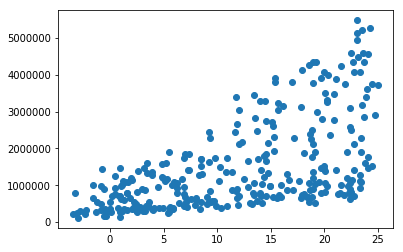

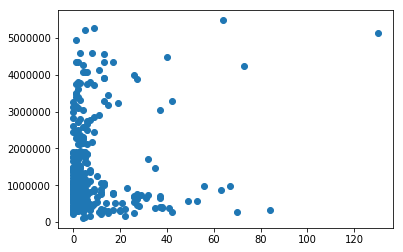

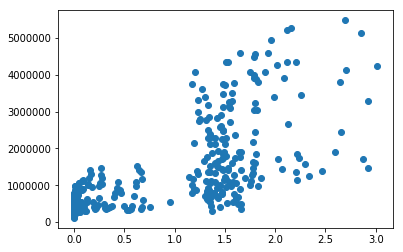

In [116]:
plt.scatter(X.Temperature,y)
plt.show()
plt.scatter(X['Number of terrorist acts'],y)
plt.show()

plt.scatter(X['Exchange Rate of Dollar'],y)
plt.show()

## Residual Error

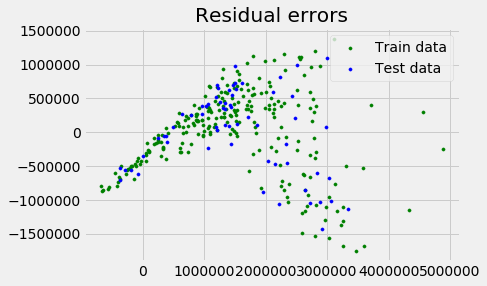

In [131]:
# plot for residual error
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## function to show plot
plt.show()